**MAT 328 Project Code**

Leah Benitez

**Importing and cleaning the data**

In [142]:
# import necessary libraries
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)

In [143]:
# store raw data from csv
data = pd.read_csv("recent-grads.csv")
data

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,5043,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,1848,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,1724,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,3154,965,2738,214,0.053621,23400,19200,26000,2403,1245,308


In [144]:
# create a new dataframe majors so there is differentiation between raw data and cleaned data
# describe quantitative columns in majors
majors = data
majors.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [145]:
# display any rows with at least one na value
majors[majors.isna().any(axis=1)]

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
21,22,1104,FOOD SCIENCE,NaN,NaN,NaN,Agriculture & Natural Resources,NaN,36,3149,2558,1121,1735,338,0.096931,53000,32000,70000,1183,1274,485


In [146]:
# drop the row with NaN values
majors = majors.dropna()

In [147]:
# rename Share_women for column naming consistency
majors.rename(columns = {"ShareWomen":"Share_women"}, inplace = True)
majors.head()

/Users/leah/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Rank,Major_code,Major,Total,Men,Women,Major_category,Share_women,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [148]:
# set rank as new index
majors.set_index("Rank", inplace=True)
majors.head()

,Major_code,Major,Total,Men,Women,Major_category,Share_women,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
Rank,,,,,,,,,,,,,,,,,,,,
1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


**Creating charts and graphs to visualize the data**

In [ ]:
# plot bar chart to show: Distribution of Major Categories
majors["Major_category"].value_counts().plot.bar()
plt.title("Distribution of Major Categories")
plt.xlabel("Major Categories")
plt.ylabel("Number of Majors")

In [ ]:
# plot histogram to show: Distribution of Major Unemployment Rates
majors["Unemployment_rate"].hist()
plt.title("Distribution of Major Unemployment Rates")
plt.xlabel("Major Unemployment Rates")
plt.ylabel("Number of Majors")

In [ ]:
# plot histogram to show: Distribution of Percentage of Women
majors["Share_women"].hist()
plt.title("Distribution of Percentage of Women")
plt.xlabel("Percentage of Women")
plt.ylabel("Number of Majors")

In [ ]:
# plot histogram to show: Distribution of Median Salary for Full-time Employees
majors["Median"].hist()
plt.title("Distribution of Median Salary for Full-time Employees")
plt.xlabel("Median Salary for Full-time Employees")
plt.ylabel("Number of Majors")

In [ ]:
# plot scatterplot to show relationship between Employed and Full-time Employment
sns.relplot(x ="Employed", y = "Full_time", data = majors)
plt.title("Employed vs. Full-time")
plt.xlabel("Employed")
plt.ylabel("Full-time")

In [ ]:
# plot scatterplot to show relationship between Percentage of Women and Median Salary
sns.relplot(x ="Share_women", y = "Median", data = majors)
plt.title("Percentage of Women vs. Median Salary for Full-time Employees")
plt.xlabel("Percentage of Women")
plt.ylabel("Median Salary for Full-time Employees")

**Using the data to make predictions**

Removing unnecessary columns, creating x and y, and test train split

In [ ]:
# remove unnecessary columns
predictions_df = majors.drop(columns=["Major_code", "Major", "Men", "Women"])
predictions_df.head()

In [ ]:
# create dummy variables from the categorical column Major_category
predictions_df = pd.get_dummies(predictions_df, columns = ["Major_category"], drop_first = True)
predictions_df.head()

In [ ]:
# print the length of the dataframe before and after creating dummy columns
print(len(majors.columns))
len(predictions_df.columns)

In [ ]:
# isolate independent variables
x = predictions_df.drop(columns=["Share_women"])
x.head()

In [ ]:
# isolate depdendent variable
y = predictions_df["Share_women"]
y[:5]

In [ ]:
# split the data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(x_train.shape[0], x_test.shape[0])
print(y_train.shape[0], y_test.shape[0])

Model 1: Polynomial regression model to predict Share_women

In [ ]:
# imports for polynomial model and mean squared error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [ ]:
# fit polynomial models with degrees 2 - 4 and print the MSEs
training_mses_pr = []
testing_mses_pr = []

for i in range(2, 5):
    print("Fitting a polynomial model with degree", i)
    
    polynomial_features = PolynomialFeatures(degree = i)
    x_train_poly = polynomial_features.fit_transform(x_train)
    x_test_poly = polynomial_features.fit_transform(x_test)

    model_pr = LinearRegression()
    model_pr.fit(x_train_poly, y_train)
    
    y_train_pred_pr = model_pr.predict(x_train_poly)
    y_test_pred_pr = model_pr.predict(x_test_poly)
    
    training_mse = mean_squared_error(y_train_pred_pr, y_train)
    testing_mse = mean_squared_error(y_test_pred_pr, y_test)
    training_mses_pr.append(training_mse)
    testing_mses_pr.append(testing_mse)
    
    print("Training MSE: ", training_mse)
    print("Testing MSE: ", testing_mse, end="\n\n")

In [ ]:
# plot the MSEs for analysis
x_coor = [2, 3, 4]
plt.plot(x_coor, training_mses_pr)
plt.plot(x_coor, testing_mses_pr)
plt.title("Polynomial Model Training and Testing MSEs")
plt.xlabel("Degree")
plt.ylabel("MSE")
plt.legend(["Training MSE", "Testing MSE"])

Model 2: K-Nearest neighbors regression model to predict Share_women

In [ ]:
# import for KNN model
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
# fit KNN models with k's 2 - 7 and print the MSEs
training_mses_knn = []
testing_mses_knn = []

for i in range(2, 8):
    print("Fitting a KNN model with", i, "neighbors")
    
    model_knn = KNeighborsRegressor(n_neighbors = i)
    model_knn.fit(x_train, y_train)
    
    y_train_pred_knn = model_knn.predict(x_train)
    y_test_pred_knn = model_knn.predict(x_test)
    
    training_mse = mean_squared_error(y_train_pred_knn, y_train)
    testing_mse = mean_squared_error(y_test_pred_knn, y_test)
    training_mses_knn.append(training_mse)
    testing_mses_knn.append(testing_mse)
    
    print("Training MSE: ", training_mse)
    print("Testing MSE: ", testing_mse, end="\n\n")

In [ ]:
# plot the MSEs for analysis
x_coor = [2, 3, 4, 5, 6, 7]
plt.plot(x_coor, training_mses_knn)
plt.plot(x_coor, testing_mses_knn)
plt.title("KNN Model Training and Testing MSEs")
plt.xlabel("Number of Neighbors")
plt.ylabel("MSE")
plt.legend(["Training MSE", "Testing MSE"])

**Performing K-means Clustering**

Step 1: Preparing and scaling the dataframe

In [130]:
# print the head of majors before reducing it to create x
majors.head()

,Major_code,Major,Total,Men,Women,Major_category,Share_women,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs,clusters
Rank,,,,,,,,,,,,,,,,,,,,,
1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193,0
2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50,0
3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0,0
4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0,0
5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972,0


In [131]:
# drop unnecessary columns to create x
x = majors.drop(columns=["Major_code", "Major", "Men", "Women", "Major_category"])
x.head()

,Total,Share_women,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs,clusters
Rank,,,,,,,,,,,,,,,,
1,2339.0,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193,0
2,756.0,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50,0
3,856.0,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0,0
4,1258.0,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0,0
5,32260.0,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972,0


In [132]:
# import MinMaxScaler and scale x so the quantitative values are between 0 and 1

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x_scaled_df = pd.DataFrame(x_scaled, columns=x.columns.tolist())
x_scaled_df.head()

,Total,Share_women,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs,clusters
0,0.005627,0.124427,0.008076,0.006417,0.006912,0.002344,0.005486,0.001314,0.103712,1.000000,1.000000,1.000000,0.010116,0.002453,0.004004,0.0
1,0.001606,0.105115,0.001188,0.002078,0.001770,0.001476,0.001386,0.003018,0.661534,0.602273,0.477124,0.660194,0.002308,0.001732,0.001037,0.0
2,0.001860,0.157941,0.000238,0.002104,0.001778,0.001155,0.001146,0.000568,0.135964,0.579545,0.411765,0.805825,0.003007,0.001186,0.000000,0.0
3,0.002881,0.110752,0.003325,0.002462,0.003810,0.001302,0.002908,0.001420,0.282832,0.545455,0.320261,0.563107,0.003488,0.000687,0.000000,0.0
4,0.081644,0.352577,0.068171,0.083440,0.091712,0.044976,0.083019,0.059356,0.344744,0.488636,0.411765,0.514563,0.120770,0.029920,0.020163,0.0


Step 2: Determine the number of clusters

In [133]:
# import KMeans and loop through k = 1 through 11 to find the inertias for k-means clusters with k clusters

from sklearn.cluster import KMeans

inertia_list = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x_scaled)
    clusters = kmeans.predict(x_scaled)
    inertia_list.append(kmeans.inertia_)

Text(0.5, 1.0, 'Inertias for K-Means Clusters k = 1-10')

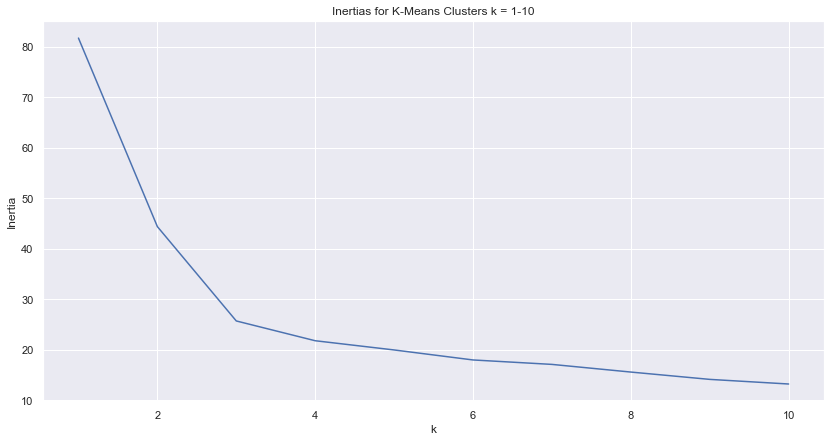

In [134]:
# create a lineplot of the different inertias

plt.plot(range(1,11), inertia_list)
plt.xlabel("k")
plt.ylabel("Inertia")
plt.title("Inertias for K-Means Clusters k = 1-10")

Step 3: Performing k-means clustering with k = 3 and analyzing the results

In [97]:
# perform k-means clustering with k = 3 and update majors so that each row shows which cluster it is in

kmeans = KMeans(n_clusters = 3)
kmeans.fit(x_scaled)
clusters = kmeans.predict(x_scaled)
majors["clusters"] = clusters
majors.head()

,Major_code,Major,Total,Men,Women,Major_category,Share_women,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs,clusters
Rank,,,,,,,,,,,,,,,,,,,,,
1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193,0
2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50,0
3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0,0
4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0,0
5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972,0


In [128]:
# create smaller datasets cluster0, cluster1 and cluster2
# each dataset represents a cluster and it contains the rows in that cluster

cluster0 = majors[majors["clusters"] == 0]
cluster1 = majors[majors["clusters"] == 1]
cluster2 = majors[majors["clusters"] == 2]

In [99]:
# display the major and major_category for each row in cluster0

cluster0[["Major", "Major_category"]]

,Major,Major_category
Rank,,
1,PETROLEUM ENGINEERING,Engineering
2,MINING AND MINERAL ENGINEERING,Engineering
3,METALLURGICAL ENGINEERING,Engineering
4,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering
5,CHEMICAL ENGINEERING,Engineering
6,NUCLEAR ENGINEERING,Engineering
7,ACTUARIAL SCIENCE,Business
8,ASTRONOMY AND ASTROPHYSICS,Physical Sciences
9,MECHANICAL ENGINEERING,Engineering


In [100]:
# display the value_counts for "Major_category" in cluster0

cluster0["Major_category"].value_counts()

Engineering                            28
Computers & Mathematics                 8
Agriculture & Natural Resources         6
Business                                5
Physical Sciences                       4
Industrial Arts & Consumer Services     4
Law & Public Policy                     2
Arts                                    1
Humanities & Liberal Arts               1
Social Science                          1
Name: Major_category, dtype: int64

In [101]:
# display the major and major_category for each row in cluster1

cluster1[["Major", "Major_category"]]

,Major,Major_category
Rank,,
40,"NUCLEAR, INDUSTRIAL RADIOLOGY, AND BIOLOGICAL ...",Physical Sciences
45,MEDICAL TECHNOLOGIES TECHNICIANS,Health
47,STATISTICS AND DECISION SCIENCE,Computers & Mathematics
49,PHARMACOLOGY,Biology & Life Science
50,OCEANOGRAPHY,Physical Sciences
...,...,...
169,ZOOLOGY,Biology & Life Science
170,EDUCATIONAL PSYCHOLOGY,Psychology & Social Work
171,CLINICAL PSYCHOLOGY,Psychology & Social Work


In [102]:
# display the value_counts for "Major_category" in cluster1

cluster1["Major_category"].value_counts()

Education                              14
Biology & Life Science                 13
Humanities & Liberal Arts              12
Health                                 11
Psychology & Social Work                8
Physical Sciences                       6
Arts                                    6
Social Science                          5
Business                                3
Communications & Journalism             3
Agriculture & Natural Resources         3
Computers & Mathematics                 2
Law & Public Policy                     2
Industrial Arts & Consumer Services     2
Engineering                             1
Interdisciplinary                       1
Name: Major_category, dtype: int64

In [103]:
# display the major and major_category for each row in cluster2

cluster2[["Major", "Major_category"]]

,Major,Major_category
Rank,,
21,COMPUTER SCIENCE,Computers & Mathematics
35,NURSING,Health
36,FINANCE,Business
37,ECONOMICS,Social Science
41,ACCOUNTING,Business
58,GENERAL BUSINESS,Business
77,BUSINESS MANAGEMENT AND ADMINISTRATION,Business
78,MARKETING AND MARKETING RESEARCH,Business
79,POLITICAL SCIENCE AND GOVERNMENT,Social Science


In [104]:
# display the value_counts for "Major_category" in cluster2

cluster2["Major_category"].value_counts()

Business                               5
Social Science                         3
Education                              2
Humanities & Liberal Arts              2
Computers & Mathematics                1
Health                                 1
Communications & Journalism            1
Law & Public Policy                    1
Arts                                   1
Biology & Life Science                 1
Industrial Arts & Consumer Services    1
Psychology & Social Work               1
Name: Major_category, dtype: int64

Text(0, 0.5, 'Number of Majors')

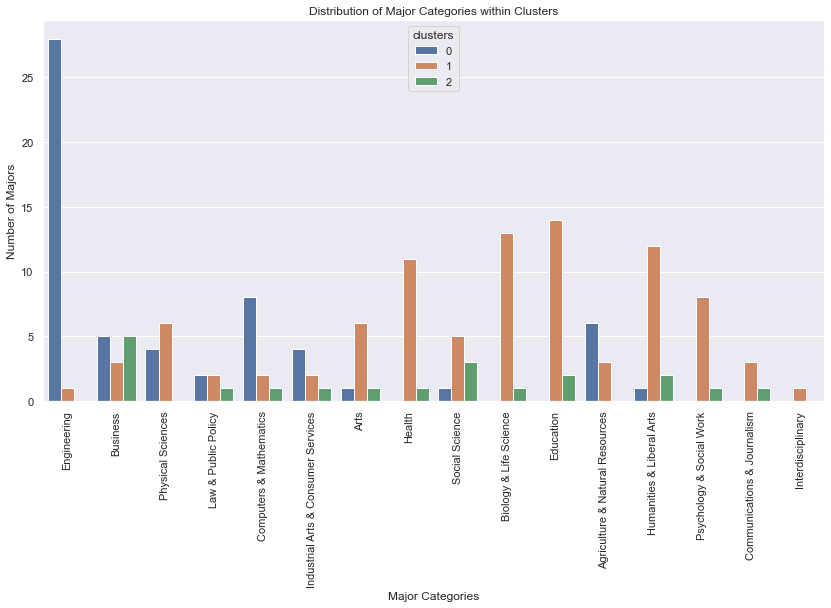

In [119]:
# plot the distribution of major categories within clusters

sns.set(rc = {'figure.figsize':(14,7)})
sns.countplot(x='Major_category', hue="clusters", data=majors)
plt.xticks(rotation=90)
plt.title("Distribution of Major Categories within Clusters")
plt.xlabel("Major Categories")
plt.ylabel("Number of Majors")

In [105]:
# print the number of majors in each cluster

print("Number of Majors in Cluster 0: ", cluster0.shape[0], " aka ", round((cluster0.shape[0] / majors.shape[0]), 2) * 100, "% of majors", sep="")
print("Number of Majors in Cluster 1: ", cluster1.shape[0], " aka ", round((cluster1.shape[0] / majors.shape[0]), 2) * 100, "% of majors", sep="")
print("Number of Majors in Cluster 2: ", cluster2.shape[0], " aka ", round((cluster2.shape[0] / majors.shape[0]), 2) * 100, "% of majors", sep="")

Number of Majors in Cluster 0: 60 aka 35.0% of majors
Number of Majors in Cluster 1: 92 aka 53.0% of majors
Number of Majors in Cluster 2: 20 aka 12.0% of majors


In [120]:
# print the average share of women in each cluster

print("Share of women in Cluster 0: ", round((cluster0["Share_women"].mean() * 100), 2), "%", sep="")
print("Share of women in Cluster 1: ", round((cluster1["Share_women"].mean() * 100), 2), "%", sep="")
print("Share of women in Cluster 2: ", round((cluster2["Share_women"].mean() * 100), 2), "%", sep="")

Share of women in Cluster 0: 27.45%
Share of women in Cluster 1: 67.04%
Share of women in Cluster 2: 58.37%


In [121]:
# print the average unemployment rate in each cluster

print("Unemployment rate in Cluster 0: ", round((cluster0["Unemployment_rate"].mean() * 100), 2), "%", sep="")
print("Unemployment rate in Cluster 1: ", round((cluster1["Unemployment_rate"].mean() * 100), 2), "%", sep="")
print("Unemployment rate in Cluster 2: ", round((cluster2["Unemployment_rate"].mean() * 100), 2), "%", sep="")

Unemployment rate in Cluster 0: 6.2%
Unemployment rate in Cluster 1: 7.07%
Unemployment rate in Cluster 2: 7.39%


Text(31.914098611111115, 0.5, 'Unemployment Rate')

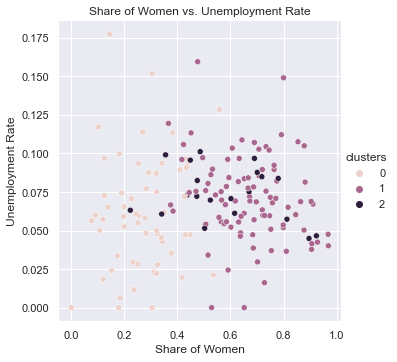

In [129]:
# plot the share of women vs. unemployment rate

sns.relplot(x="Share_women", y="Unemployment_rate", hue="clusters", data=majors)
plt.title("Share of Women vs. Unemployment Rate")
plt.xlabel("Share of Women")
plt.ylabel("Unemployment Rate")

**Extra Credit**

In [216]:
# print the head of majors before reducing it to create df

majors.head()

,Major_code,Major,Total,Men,Women,Major_category,Share_women,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
Rank,,,,,,,,,,,,,,,,,,,,
1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [217]:
# Group by major category then find the sum for multiple columns
# Compute percentage of college, non-college and low wage jobs (based off number of employed people)

df = majors.groupby("Major_category")["Employed", "College_jobs", "Non_college_jobs", "Low_wage_jobs"].sum().reset_index()
df["College Percentage"] = df["College_jobs"] / df["Employed"]
df["Non-College Percentage"] = df["Non_college_jobs"] / df["Employed"]
df["Low Wage Percentage"] = df["Low_wage_jobs"] / df["Employed"]
df

/var/folders/37/k02_kmtn5wzfmt3_v__jgh440000gn/T/ipykernel_33244/774453192.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = majors.groupby("Major_category")["Employed", "College_jobs", "Non_college_jobs", "Low_wage_jobs"].sum().reset_index()


,Major_category,Employed,College_jobs,Non_college_jobs,Low_wage_jobs,College Percentage,Non-College Percentage,Low Wage Percentage
0,Agriculture & Natural Resources,63794,18677,33217,7414,0.292770,0.520692,0.116218
1,Arts,288114,94785,163720,60116,0.328984,0.568247,0.208654
2,Biology & Life Science,302797,151233,127182,42742,0.499453,0.420024,0.141157
3,Business,1088742,148538,496570,126788,0.136431,0.456095,0.116454
4,Communications & Journalism,330660,86556,172992,49595,0.261767,0.523172,0.149988
5,Computers & Mathematics,237894,137859,74463,16136,0.579498,0.313009,0.067829
6,Education,479839,338713,121761,40870,0.705889,0.253754,0.085174
7,Engineering,420372,269767,102383,25079,0.641734,0.243553,0.059659
8,Health,372147,245441,110496,31270,0.659527,0.296915,0.084026
9,Humanities & Liberal Arts,544118,192650,276532,94240,0.354059,0.508221,0.173198


Text(0, 0.5, 'Percentage')

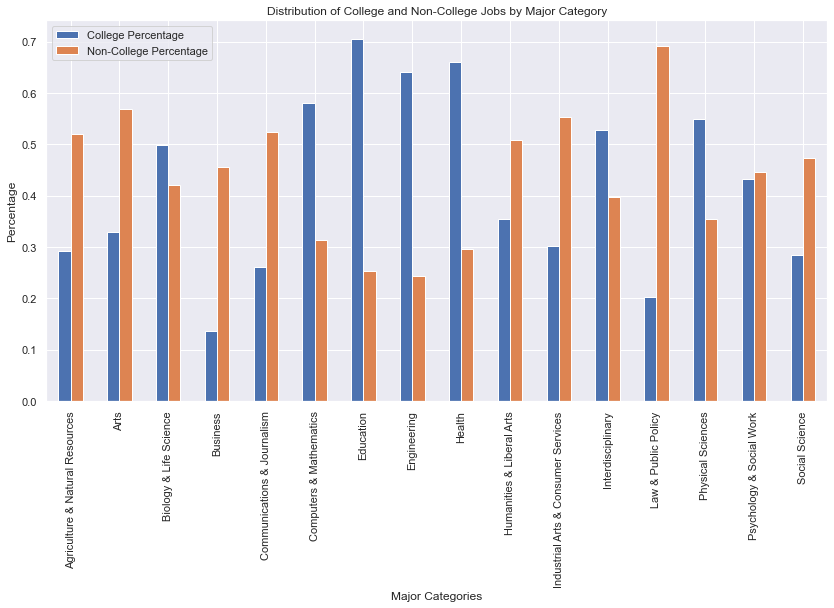

In [218]:
# plot the distribution of college and non-College jobs by major category

df.plot(x="Major_category", y=["College Percentage", "Non-College Percentage"], kind="bar")
plt.xticks(rotation=90)
plt.title("Distribution of College and Non-College Jobs by Major Category")
plt.xlabel("Major Categories")
plt.ylabel("Percentage")

Text(0, 0.5, 'Percentage')

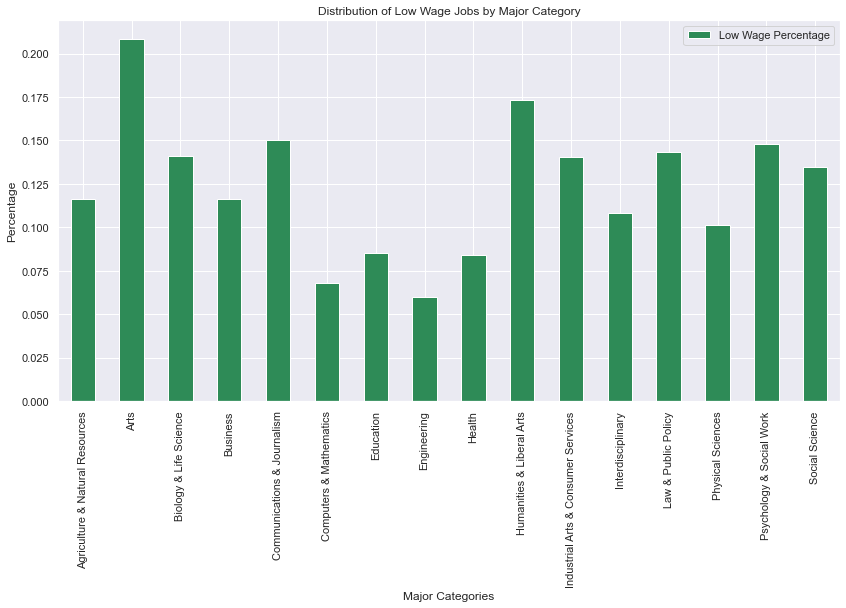

In [219]:
# plot the distribution of low wage jobs by major category

df.plot(x="Major_category", y="Low Wage Percentage", kind="bar", color="seagreen")
plt.xticks(rotation=90)
plt.title("Distribution of Low Wage Jobs by Major Category")
plt.xlabel("Major Categories")
plt.ylabel("Percentage")

In [220]:
# Group by major category then find the mean of "Median"
# Rename the "Median" column to "Mean"

df = majors.groupby("Major_category")["Median"].mean().reset_index()
df.columns = ["Major_category", "Mean"]
df

,Major_category,Mean
0,Agriculture & Natural Resources,35111.111111
1,Arts,33062.500000
2,Biology & Life Science,36421.428571
3,Business,43538.461538
4,Communications & Journalism,34500.000000
5,Computers & Mathematics,42745.454545
6,Education,32350.000000
7,Engineering,57382.758621
8,Health,36825.000000
9,Humanities & Liberal Arts,31913.333333


Text(0, 0.5, 'Salary')

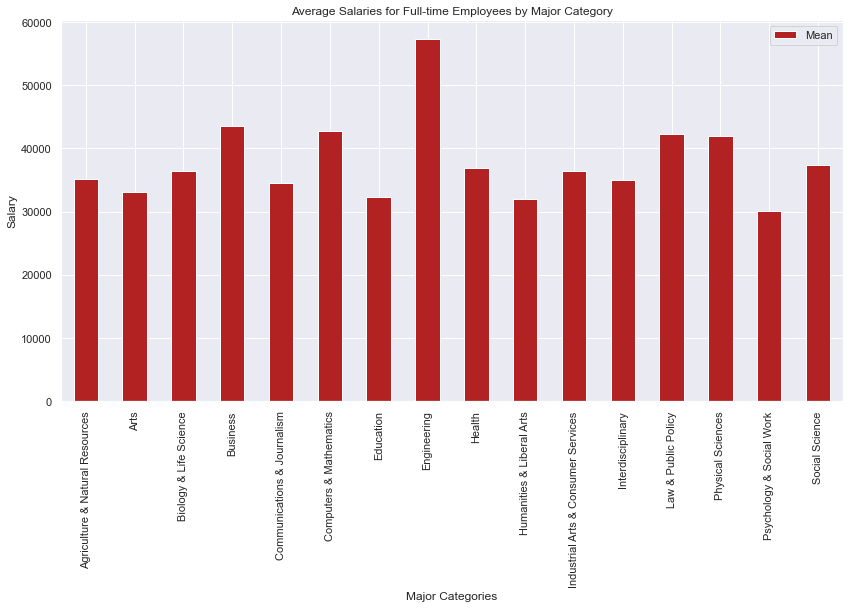

In [223]:
# plot the average salaries for full-time employees by major category

df.plot(x="Major_category", y="Mean", kind="bar", color="firebrick")
plt.xticks(rotation=90)
plt.title("Average Salaries for Full-time Employees by Major Category")
plt.xlabel("Major Categories")
plt.ylabel("Salary")